<a href="https://colab.research.google.com/github/SHee0122/ITandBUSINESS/blob/main/ITBclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 환경설정

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt # Matplotlib의 pyplot 로딩하기

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [93]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [95]:
import mglearn

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 데이터 불러오기

In [97]:
# csv 데이터 가져오기, id를 인덱스로 지정
health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/health_data.csv")

print(health.columns)
display(health.info())      # 569행의 데이터 - id는 index이므로 생략됨, diagnosis와 30개 변수 (결측치 없음)  
display(health.head())      # 처음 5행 확인

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)   

None

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [98]:
health.describe()  # id는 인덱스로 지정되어 있으므로 id를 제외한 변수들의 기술통계 정보를 보여줌 

,기준년도,가입자일련번호,시도코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
count,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,3977.000000,9912.000000,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,10000.000000,3251.000000,3251.000000
mean,2020.0,5000.50000,34.100100,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,...,116.263264,14.214255,1.119461,0.848484,27.58979,26.789851,38.098668,0.325100,0.175331,0.579514
std,0.0,2886.89568,12.394581,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,...,37.829955,1.555386,0.489782,0.301012,17.88442,23.735687,58.184579,0.468436,0.380308,0.591269
min,2020.0,1.00000,11.000000,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,...,13.000000,5.100000,1.000000,0.050000,3.00000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,2020.0,2500.75000,27.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,...,89.000000,13.200000,1.000000,0.700000,20.00000,16.000000,16.000000,0.000000,0.000000,0.000000
50%,2020.0,5000.50000,41.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,...,115.000000,14.200000,1.000000,0.800000,24.00000,21.000000,24.000000,0.000000,0.000000,1.000000
75%,2020.0,7500.25000,44.000000,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,...,141.000000,15.300000,1.000000,1.000000,30.00000,31.000000,39.000000,1.000000,0.000000,1.000000
max,2020.0,10000.00000,49.000000,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,...,297.000000,20.000000,6.000000,9.200000,692.00000,1146.000000,2322.000000,1.000000,1.000000,2.000000


## 데이터 전처리

In [99]:
def male_or_female(x) :
    if x == "M":
        return 1
    elif x == "F":
        return 0

health['성별코드'] = health["성별코드"].apply(male_or_female)
health = health.dropna(subset = ['성별코드'])

def SMK_STAT_TYPE_CD(x):
    if x == "No":
        return 1
    elif x == "NotNow":
        return 2
    elif x == "Yes" :
        return 3

health["흡연상태"] = health["흡연상태"].apply(SMK_STAT_TYPE_CD)
health = health.dropna(subset = ['흡연상태'])

def DRK_YND(x):
    if x == "No":
        return 0
    elif x == "Yes" :
        return 1

health["음주여부"] = health["음주여부"].apply(DRK_YND)
health = health.dropna(subset = ['음주여부'])

health = health.drop(['데이터공개일자'], axis=1)
health.head()
health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         9997 non-null   int64  
 1   가입자일련번호      9997 non-null   int64  
 2   시도코드         9997 non-null   int64  
 3   성별코드         9997 non-null   int64  
 4   연령대코드(5세단위)  9997 non-null   int64  
 5   신장(5Cm단위)    9997 non-null   int64  
 6   체중(5Kg 단위)   9997 non-null   int64  
 7   허리둘레         9997 non-null   float64
 8   시력(좌)        9997 non-null   float64
 9   시력(우)        9997 non-null   float64
 10  청력(좌)        9997 non-null   int64  
 11  청력(우)        9997 non-null   int64  
 12  수축기혈압        9909 non-null   float64
 13  이완기혈압        9909 non-null   float64
 14  식전혈당(공복혈당)   9909 non-null   float64
 15  총콜레스테롤       4043 non-null   float64
 16  트리글리세라이드     4043 non-null   float64
 17  HDL콜레스테롤     4043 non-null   float64
 18  LDL콜레스테롤     3976 non-null   float64
 19  혈색소   

## 시각화

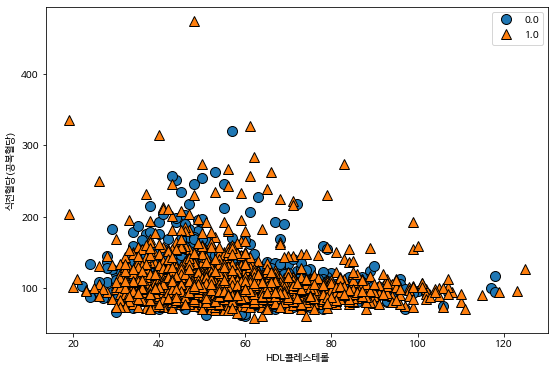

In [100]:
mglearn.discrete_scatter(health['HDL콜레스테롤'], health['식전혈당(공복혈당)'], health['음주여부'])
plt.xlabel("HDL콜레스테롤")
plt.ylabel("식전혈당(공복혈당)")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


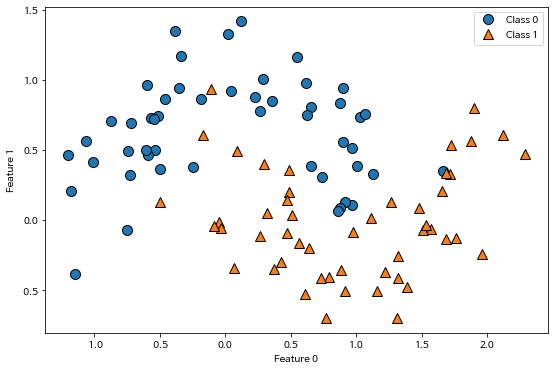

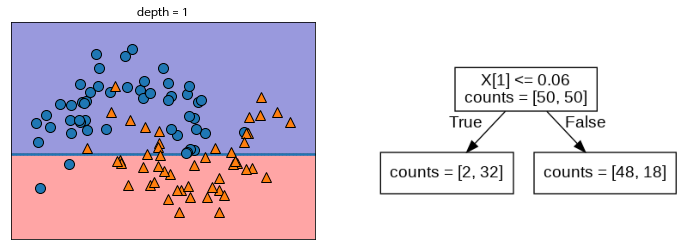

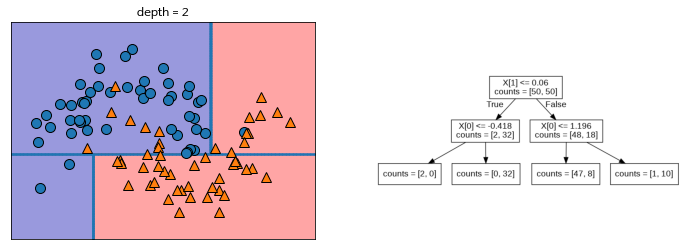

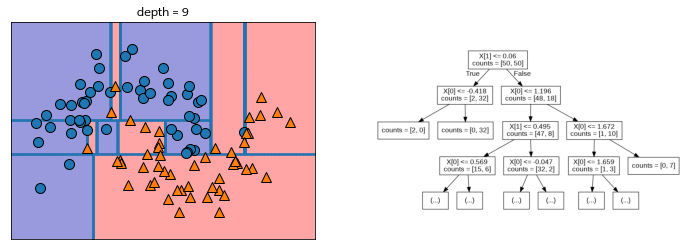

In [101]:
mglearn.plots.plot_tree_progressive()

In [102]:
health.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.0,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN
1,2020,2,27,0,13,150,65,81.0,0.8,0.8,...,1.0,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN
2,2020,3,11,0,12,155,55,70.0,0.6,0.7,...,1.0,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.0,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0
4,2020,5,41,0,12,155,50,75.2,1.5,1.2,...,1.0,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN


In [103]:
health['음주여부'].value_counts()

1.0    5817
0.0    4180
Name: 음주여부, dtype: int64

In [104]:
health.loc[:, '음주여부']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    1.0
9996    1.0
9997    0.0
9998    0.0
9999    1.0
Name: 음주여부, Length: 9997, dtype: float64

In [105]:
# 콜레스테롤 결측치 처리
null_index =health[health['HDL콜레스테롤'].isna()].index
health.loc[null_index,'HDL콜레스테롤'] = health['HDL콜레스테롤'].mean()

In [106]:
health.loc[null_index,'HDL콜레스테롤']

1       56.156369
2       56.156369
3       56.156369
7       56.156369
9       56.156369
          ...    
9993    56.156369
9995    56.156369
9996    56.156369
9997    56.156369
9998    56.156369
Name: HDL콜레스테롤, Length: 5954, dtype: float64

In [107]:
# 식전혈당 결측치 처리
null_index =health[health['식전혈당(공복혈당)'].isna()].index
health.loc[null_index,'식전혈당(공복혈당)'] = health['식전혈당(공복혈당)'].mean()

In [108]:
health.loc[null_index,'식전혈당(공복혈당)']

168     103.781411
299     103.781411
306     103.781411
391     103.781411
437     103.781411
           ...    
9426    103.781411
9474    103.781411
9640    103.781411
9777    103.781411
9800    103.781411
Name: 식전혈당(공복혈당), Length: 88, dtype: float64

In [109]:
health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         9997 non-null   int64  
 1   가입자일련번호      9997 non-null   int64  
 2   시도코드         9997 non-null   int64  
 3   성별코드         9997 non-null   int64  
 4   연령대코드(5세단위)  9997 non-null   int64  
 5   신장(5Cm단위)    9997 non-null   int64  
 6   체중(5Kg 단위)   9997 non-null   int64  
 7   허리둘레         9997 non-null   float64
 8   시력(좌)        9997 non-null   float64
 9   시력(우)        9997 non-null   float64
 10  청력(좌)        9997 non-null   int64  
 11  청력(우)        9997 non-null   int64  
 12  수축기혈압        9909 non-null   float64
 13  이완기혈압        9909 non-null   float64
 14  식전혈당(공복혈당)   9997 non-null   float64
 15  총콜레스테롤       4043 non-null   float64
 16  트리글리세라이드     4043 non-null   float64
 17  HDL콜레스테롤     9997 non-null   float64
 18  LDL콜레스테롤     3976 non-null   float64
 19  혈색소   

In [110]:
health.columns

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석'],
      dtype='object')

In [111]:
new_health = health[['음주여부', '식전혈당(공복혈당)', 'HDL콜레스테롤','성별코드', '연령대코드(5세단위)', '신장(5Cm단위)','체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)','흡연상태'
            , '구강검진수검여부']]

In [112]:
new_health.head()

,음주여부,식전혈당(공복혈당),HDL콜레스테롤,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),흡연상태,구강검진수검여부
0,0.0,90.0,58.000000,1,9,165,60,72.1,1.2,1.5,1,1,1.0,0
1,0.0,87.0,56.156369,0,13,150,65,81.0,0.8,0.8,1,1,1.0,0
2,0.0,102.0,56.156369,0,12,155,55,70.0,0.6,0.7,1,1,1.0,0
3,0.0,146.0,56.156369,1,13,160,70,90.8,1.0,1.0,1,2,1.0,1
4,0.0,110.0,53.000000,0,12,155,50,75.2,1.5,1.2,1,1,1.0,0


In [113]:
new_health.iloc[:, 0]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    1.0
9996    1.0
9997    0.0
9998    0.0
9999    1.0
Name: 음주여부, Length: 9997, dtype: float64

# 분류모델

## feature importance 함수

In [114]:
import numpy as np

def plot_feature_importances_health(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(new_health.columns[1:])  # 30개 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), new_health.columns[1:])   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

## decision tree

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = new_health.iloc[:, 1:]  # 30개 변수 
y = new_health.iloc[:, 0]   # target 변수 '음주여부' 

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#try:
#    ax.set_ylim([y.min()-0.05, y.max()+0.05])
#except ValueError:  #raised if `y` is empty.
#    pass
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.719
시험용 데이터 정확도: 0.698


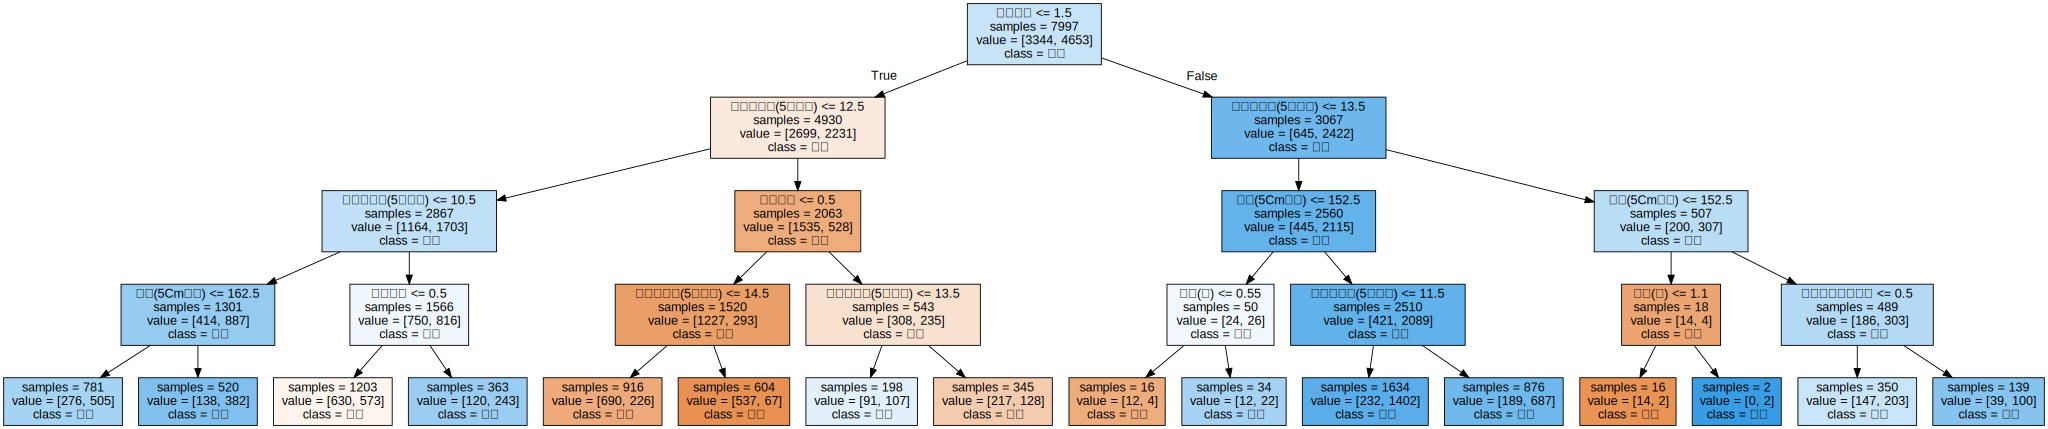

In [116]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "금주", "음주"],
                feature_names = new_health.columns[1:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

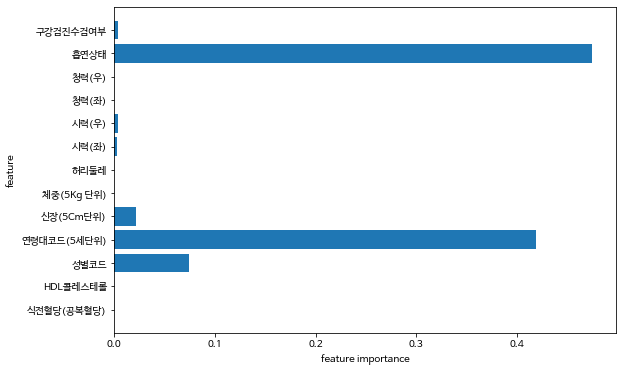

In [117]:
plot_feature_importances_health(tree)

## random forest

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


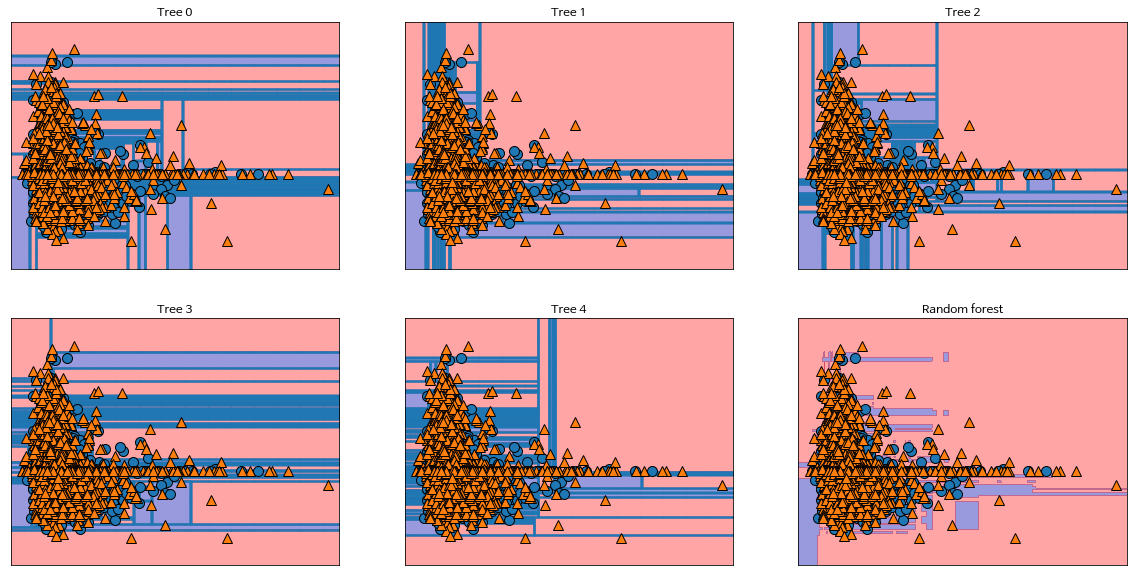

In [118]:
from sklearn.ensemble import RandomForestClassifier

# radius_mean, texture_mean 변수만 이용하여 
# 5개의 나무를 만드는 예 (n_estimators = 5, 실제는 수백개의 트리를 만든다)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train.iloc[:, 0:2], y_train)

# 5개 나무 각각의 분류 경계를 그림 (서로 모양이 많이 다르다)
# 2차원으로 나무의 결과를 보여주기 위한 코드로 mglearn의 함수들을 이용 - 여기서는 설명 생략
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X.iloc[:, 0:2].values, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X.iloc[:, 0:2].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.show()

In [119]:
from sklearn.ensemble import RandomForestClassifier

# radius_mean, texture_mean 변수만 이용하여 
# 5개의 나무를 만드는 예 (n_estimators = 5, 실제는 수백개의 트리를 만든다)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)


print("학습용 데이터 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 정확도: 0.960
시험용 데이터 정확도: 0.681


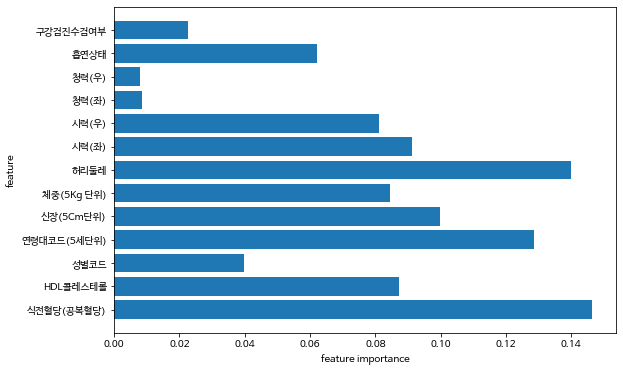

In [120]:
plot_feature_importances_health(forest)

## gradientboosting

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [122]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.711
시험용 데이터 세트 정확도: 0.713


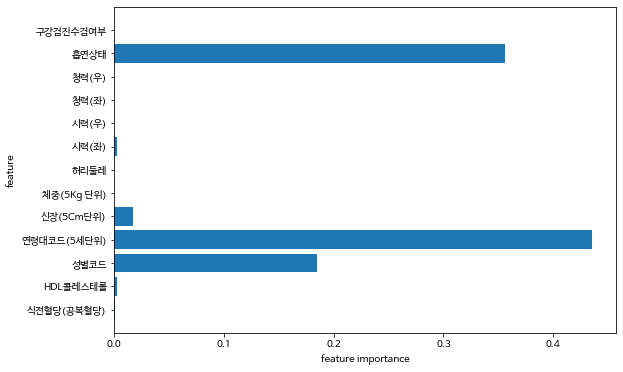

In [123]:
plot_feature_importances_health(gbrt)

#분류 모델 평가

## 교차검증

In [125]:
# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy
Decision tree:  [0.61       0.61625    0.615      0.64125    0.6125     0.64
 0.60875    0.61076345 0.61952441 0.59949937]
Random forest:  [0.6725     0.66625    0.66625    0.66625    0.66375    0.66125
 0.665      0.66958698 0.67209011 0.62578223]
Gradient boosting:  [0.69375    0.69375    0.705      0.71125    0.725      0.72375
 0.72375    0.718398   0.70963705 0.68836045]
Accuracy mean
Decision tree :0.617
Random forest :0.663
Gradient boosting :0.709


##그리드 서치

In [129]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

In [130]:
# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)
# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.719769,9,0.718680,0.728807,0.711820
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.720644,4,0.719055,0.732183,0.710694
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.719894,8,0.720555,0.726557,0.712570
3,"{'learning_rate': 0.08, 'max_depth': 1}",0.718894,10,0.717179,0.728807,0.710694
4,"{'learning_rate': 0.08, 'max_depth': 2}",0.721394,2,0.721305,0.730308,0.712570
5,"{'learning_rate': 0.08, 'max_depth': 3}",0.720144,7,0.722056,0.727307,0.711069
6,"{'learning_rate': 0.06, 'max_depth': 1}",0.717893,11,0.714929,0.727307,0.711445
7,"{'learning_rate': 0.06, 'max_depth': 2}",0.722020,1,0.720930,0.731433,0.713696
8,"{'learning_rate': 0.06, 'max_depth': 3}",0.720269,6,0.719430,0.728807,0.712570
9,"{'learning_rate': 0.04, 'max_depth': 1}",0.716393,14,0.712303,0.726932,0.709944


In [131]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

GridSearchCV 최적 파라미터: {'learning_rate': 0.06, 'max_depth': 2}
GridSearchCV 최고 정확도: 0.7220
시험용 데이터 세트 정확도: 0.713


##모델 평가 지표

###정오 분류표

In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

print(y_test.value_counts()) # y_test 의 B,M 분포

dt_pred = tree.predict(X_test)
rf_pred = forest.predict(X_test)
grid_gbrt_pred = grid_gbrt.predict(X_test)

# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력
print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, grid_gbrt_pred)))
print(confusion_matrix(y_test, grid_gbrt_pred))

1.0    1164
0.0     836
Name: 음주여부, dtype: int64
Decision tree 시험용 데이터 세트 정확도:0.698
[[538 298]
 [307 857]]
Random forest 시험용 데이터 세트 정확도:0.681
[[493 343]
 [294 870]]
Gradient boosting 시험용 데이터 세트 정확도:0.713
[[495 341]
 [233 931]]


In [134]:
from sklearn.metrics import classification_report

# 각 클래스가 Positive일 때의 정밀도, 재현율, f1 값을 보여줌 ("M"이 Postivit인 경우가 기본값임)
# macro avg는 클래스별 점수의 평균을 계산
# weighted avg는 클래스의 샘플 수로 가중평균을 계산
print("Decision Tree:")
print(classification_report(y_test, dt_pred, target_names=["B", "M"]))
print("Random Forest:")
print(classification_report(y_test, rf_pred, target_names=["B", "M"]))
print("Gradient Boosting:")
print(classification_report(y_test, grid_gbrt_pred, target_names=["B", "M"]))

Decision Tree:
              precision    recall  f1-score   support

           B       0.64      0.64      0.64       836
           M       0.74      0.74      0.74      1164

    accuracy                           0.70      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.70      0.70      0.70      2000

Random Forest:
              precision    recall  f1-score   support

           B       0.63      0.59      0.61       836
           M       0.72      0.75      0.73      1164

    accuracy                           0.68      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.68      0.68      0.68      2000

Gradient Boosting:
              precision    recall  f1-score   support

           B       0.68      0.59      0.63       836
           M       0.73      0.80      0.76      1164

    accuracy                           0.71      2000
   macro avg       0.71      0.70      0.70      2000
weighted avg       0.71  

#인사이트 도출

독립변수를 식전혈당(공복혈당),	HDL콜레스테롤으로 종속변수를 음주여부로 각각 설정하여 분류 모델을 통한 학습 결과를 확인해보았다. 
먼저 결정나무를 통해서 결과를 보았을 때, 학습용 데이터 정확도: 0.719, 시험용 데이터 정확도: 0.698으로 비교적 낮은 정확도를 보였다.
랜덤 포레스트로 결과를 살펴보았을 때, 학습용 데이터 정확도: 0.960
시험용 데이터 정확도: 0.681으로 학습용 데이터 정확도는 높은 반면 시험용 데이터는 정확도가 다소 낮은 모습을 보였다. 예측 상 과적합의 문제가 다소 보인 것으로 판단된다.
마지막 그래디언트 부스팅으로 분류해보았을 때 학습 데이터 세트 정확도: 0.711
시험용 데이터 세트 정확도: 0.713으로 가장 적절한 정확도와 비율로 판단된다.

분류모델을 통해 결과를 살펴보았을 때 식전혈당과 HDL콜레스테롤 수치가 높은 사람의 경우 음주인의 상태가 더 많다고 할 수 있다.
또한 음주여부를 예측할 때는 흡연, 연령, 성별의 요소들이 결과에 가장 큰 영향을 미치는 것으로 나타났다.